In [36]:
#standard packages
import pandas as pd
import numpy as np
#package for loop load time bar
from tqdm import tqdm
#statistical and machine learning packages
import scipy as sp
from sklearn.preprocessing import OneHotEncoder
# packages for plotting 
import matplotlib.pyplot as plt
import seaborn as sns
#command to have graphs display in notebook
%matplotlib inline

In [3]:
#loading user order information
instacart_file=pd.read_csv('Capstone Project 1/Data/orders.csv')
df_orders=pd.DataFrame(instacart_file,)
df_orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
df_orders.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [5]:
#capture the last order information for each user
g = df_orders.groupby('user_id')
data_p1=g.last()
data_p1['order_from_last']=1

In [6]:
#capture the second to last order information for each user
data_p2=g.nth(-2)
data_p2['order_from_last']=2

In [7]:
#capture the third to last order information for each user
data_p3=g.nth(-3)
data_p3['order_from_last']=3

In [8]:
#capture the fourth to last order information for each user
data_p4=g.nth(-4)
data_p4['order_from_last']=4

In [9]:
#join all information into one data set
data_set=pd.concat([data_p1,data_p2,data_p3,data_p4])

In [10]:
data_set=data_set.reset_index()

In [11]:
#loading product reorder information
instacart_file2=pd.read_csv('Capstone Project 1/Data/order_products__prior.csv')
df_prod_orders=pd.DataFrame(instacart_file2,)
df_prod_orders.head()



,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [12]:
#loading information for product names
instacart_products=pd.read_csv('Capstone Project 1/Data/products.csv')
df_prod=pd.DataFrame(instacart_products,)
df_prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:
#merge dataframes to get user_id with product_id and reorder in same dataframe
#use inner to get the intersection in order to preserve test set
df_rf_data=pd.merge(df_prod_orders,data_set, how= 'right',left_on="order_id", right_on='order_id')
df_rf_data.head()


,order_id,product_id,add_to_cart_order,reordered,user_id,days_since_prior_order,eval_set,order_dow,order_from_last,order_hour_of_day,order_number
0,7,34050.0,1.0,0.0,142903,30.0,prior,2,3,14,11
1,7,46802.0,2.0,0.0,142903,30.0,prior,2,3,14,11
2,14,20392.0,1.0,1.0,18194,3.0,prior,3,4,15,49
3,14,27845.0,2.0,1.0,18194,3.0,prior,3,4,15,49
4,14,162.0,3.0,1.0,18194,3.0,prior,3,4,15,49


In [14]:
#does not have reorder information will have to use on test set
# will have to create reorder column to use in scoring
extra_data=df_rf_data[df_rf_data['order_from_last']==1]

In [15]:
df_rf_data.nunique()

order_id                  824836
product_id                 47702
add_to_cart_order            121
reordered                      2
user_id                   206209
days_since_prior_order        31
eval_set                       3
order_dow                      7
order_from_last                4
order_hour_of_day             24
order_number                 100
dtype: int64

In [16]:
#designate a training to consist of previous orders 4 and add column to track 
df_rf_train=df_rf_data[ (df_rf_data['order_from_last']==4 )]
df_rf_train.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,days_since_prior_order,eval_set,order_dow,order_from_last,order_hour_of_day,order_number
2,14,20392.0,1.0,1.0,18194,3.0,prior,3,4,15,49
3,14,27845.0,2.0,1.0,18194,3.0,prior,3,4,15,49
4,14,162.0,3.0,1.0,18194,3.0,prior,3,4,15,49
5,14,2452.0,4.0,1.0,18194,3.0,prior,3,4,15,49
6,14,8575.0,5.0,1.0,18194,3.0,prior,3,4,15,49


In [17]:
#creat validation set to track data
df_rf_validate=df_rf_data[(df_rf_data['order_from_last']==3) ]
df_rf_validate.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,days_since_prior_order,eval_set,order_dow,order_from_last,order_hour_of_day,order_number
0,7,34050.0,1.0,0.0,142903,30.0,prior,2,3,14,11
1,7,46802.0,2.0,0.0,142903,30.0,prior,2,3,14,11
13,16,9755.0,1.0,1.0,174840,13.0,prior,3,3,12,18
14,16,25466.0,2.0,0.0,174840,13.0,prior,3,3,12,18
15,16,45437.0,3.0,0.0,174840,13.0,prior,3,3,12,18


In [18]:
# creat test set and label
df_rf_test=df_rf_data[(df_rf_data['order_from_last']==2)]
df_rf_test.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,days_since_prior_order,eval_set,order_dow,order_from_last,order_hour_of_day,order_number
30,25,9755.0,1.0,1.0,59897,25.0,prior,6,2,10,19
31,25,31487.0,2.0,0.0,59897,25.0,prior,6,2,10,19
32,25,37510.0,3.0,1.0,59897,25.0,prior,6,2,10,19
33,25,14576.0,4.0,1.0,59897,25.0,prior,6,2,10,19
34,25,22105.0,5.0,0.0,59897,25.0,prior,6,2,10,19


In [19]:
print(df_rf_test.size)
print(df_rf_validate.size)
print(df_rf_train.size)


23537668
23264186
23039357


In [20]:
#capture feature names and make a list
features=df_rf_data[['add_to_cart_order','days_since_prior_order','order_dow','order_from_last','order_hour_of_day','order_number']]
feature_list = list(features.columns)
features=features.columns
features

Index([u'add_to_cart_order', u'days_since_prior_order', u'order_dow',
       u'order_from_last', u'order_hour_of_day', u'order_number'],
      dtype='object')

In [21]:
feature_list

['add_to_cart_order',
 'days_since_prior_order',
 'order_dow',
 'order_from_last',
 'order_hour_of_day',
 'order_number']

In [22]:
#convert target column into array
y = pd.factorize(df_rf_train['reordered'])[0]
y

array([0, 0, 0, ..., 1, 0, 0])

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
#seed random generator
np.random.seed(42)

In [25]:
#create classifier
clf = RandomForestClassifier(n_jobs=2, random_state=42)

In [26]:
df_rf_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094487 entries, 2 to 6349193
Data columns (total 11 columns):
order_id                  int64
product_id                float64
add_to_cart_order         float64
reordered                 float64
user_id                   int64
days_since_prior_order    float64
eval_set                  object
order_dow                 int64
order_from_last           int64
order_hour_of_day         int64
order_number              int64
dtypes: float64(4), int64(6), object(1)
memory usage: 191.8+ MB


In [27]:
#check data for NAN
df_rf_train.isnull().any()

order_id                  False
product_id                False
add_to_cart_order         False
reordered                 False
user_id                   False
days_since_prior_order     True
eval_set                  False
order_dow                 False
order_from_last           False
order_hour_of_day         False
order_number              False
dtype: bool

In [28]:
#fill in Nan with zero
df_rf_train=df_rf_train.fillna(0)

In [29]:
df_rf_train.isnull().any()

order_id                  False
product_id                False
add_to_cart_order         False
reordered                 False
user_id                   False
days_since_prior_order    False
eval_set                  False
order_dow                 False
order_from_last           False
order_hour_of_day         False
order_number              False
dtype: bool

In [30]:
#train data on Random Forest
clf.fit(df_rf_train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [31]:
#make some predictions
preds=clf.predict(df_rf_test[features])

In [32]:
# see first probability 
clf.predict_proba(df_rf_test[features])[0:10]

array([[ 0.2       ,  0.8       ],
       [ 1.        ,  0.        ],
       [ 0.96666667,  0.03333333],
       [ 1.        ,  0.        ],
       [ 0.8       ,  0.2       ],
       [ 0.        ,  1.        ],
       [ 0.3       ,  0.7       ],
       [ 0.5       ,  0.5       ],
       [ 0.4       ,  0.6       ],
       [ 0.2       ,  0.8       ]])

In [33]:
#make a table of the predictions vs. the actual reorders
pd.crosstab(df_rf_test['reordered'], preds, rownames=['Actual reorder'], colnames=['Predicted reorder'])

Predicted reorder,0,1
Actual reorder,,
0.0,470238,414957
1.0,885381,369212


In [34]:
#make a list of feature and feature importance
list(zip(df_rf_train[features], clf.feature_importances_))

[('add_to_cart_order', 0.15916638287155632),
 ('days_since_prior_order', 0.25943707389502357),
 ('order_dow', 0.054974995740920587),
 ('order_from_last', 0.0),
 ('order_hour_of_day', 0.14871881139999882),
 ('order_number', 0.3777027360925006)]

In [38]:
importances=clf.feature_importances_

<function matplotlib.pyplot.tight_layout>

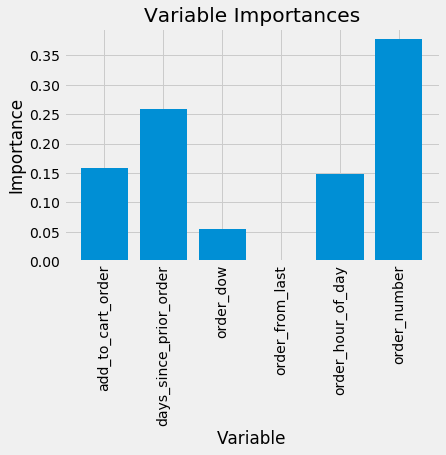

In [39]:
#plot the variable importances
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.tight_layout

In [40]:
rf_small_train=df_rf_train.sample(750)

In [41]:
rf_small_table=rf_small_train.pivot(index='user_id', columns='product_id', values='reordered')

In [42]:
rf_small_table.replace(0, 1, regex=True)
rf_small_table.fillna(0)

product_id,10.0,45.0,196.0,284.0,334.0,421.0,432.0,459.0,1006.0,1148.0,...,48679.0,48706.0,48946.0,49098.0,49113.0,49176.0,49215.0,49235.0,49374.0,49683.0
user_id,,,,,,,,,,,,,,,,,,,,,
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
rf_small_train=rf_small_train.set_index('user_id')

In [44]:
rf_small_train.head()

,order_id,product_id,add_to_cart_order,reordered,days_since_prior_order,eval_set,order_dow,order_from_last,order_hour_of_day,order_number
user_id,,,,,,,,,,
87866,355407,41026.0,8.0,1.0,7.0,prior,0,4,13,34
199005,2015532,28204.0,6.0,1.0,5.0,prior,1,4,13,60
135738,320509,47766.0,8.0,1.0,15.0,prior,2,4,10,4
160701,460499,5223.0,24.0,1.0,8.0,prior,0,4,10,12
204615,251737,17795.0,1.0,1.0,14.0,prior,5,4,20,19


In [45]:
pd.merge(rf_small_train,rf_small_table, how= 'inner',left_index=True, right_index=True)

,order_id,product_id,add_to_cart_order,reordered,days_since_prior_order,eval_set,order_dow,order_from_last,order_hour_of_day,order_number,...,48679.0,48706.0,48946.0,49098.0,49113.0,49176.0,49215.0,49235.0,49374.0,49683.0
user_id,,,,,,,,,,,,,,,,,,,,,
71,2075249,33290.0,25.0,1.0,18.0,prior,3,4,15,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,1177195,45443.0,10.0,0.0,0.0,prior,2,4,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704,1030495,24489.0,4.0,1.0,4.0,prior,4,4,13,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879,2806695,5212.0,6.0,0.0,10.0,prior,1,4,13,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
974,1018845,14814.0,20.0,0.0,30.0,prior,6,4,8,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,2494459,4799.0,17.0,0.0,8.0,prior,1,4,10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906,257085,3835.0,5.0,0.0,0.0,prior,2,4,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2524,64929,23375.0,8.0,0.0,8.0,prior,3,4,8,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2614,2987099,14992.0,6.0,0.0,30.0,prior,0,4,14,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
join=rf_small_train.join(rf_small_table)

In [48]:
join


,order_id,product_id,add_to_cart_order,reordered,days_since_prior_order,eval_set,order_dow,order_from_last,order_hour_of_day,order_number,...,48679.0,48706.0,48946.0,49098.0,49113.0,49176.0,49215.0,49235.0,49374.0,49683.0
user_id,,,,,,,,,,,,,,,,,,,,,
71,2075249,33290.0,25.0,1.0,18.0,prior,3,4,15,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,1177195,45443.0,10.0,0.0,0.0,prior,2,4,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704,1030495,24489.0,4.0,1.0,4.0,prior,4,4,13,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879,2806695,5212.0,6.0,0.0,10.0,prior,1,4,13,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
974,1018845,14814.0,20.0,0.0,30.0,prior,6,4,8,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,2494459,4799.0,17.0,0.0,8.0,prior,1,4,10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906,257085,3835.0,5.0,0.0,0.0,prior,2,4,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2524,64929,23375.0,8.0,0.0,8.0,prior,3,4,8,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2614,2987099,14992.0,6.0,0.0,30.0,prior,0,4,14,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
